In [76]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams["figure.figsize"] = [12,9]
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
import statsmodels.api as sm
import seaborn as srn
import os
cwd = os.getcwd()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [17]:
pd.set_option('display.max_columns', None)

In [8]:
data_path = cwd + r'\2020_match.csv'
data = pd.read_csv(data_path)

In [10]:
df = data.copy()
df.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
0,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,23.0,4888.0,7368.0,131.0,4723.0,7202.0,118.0,165.0,166.0,13.0
1,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,-10.0,4385.0,4817.0,91.0,4784.0,4667.0,98.0,-399.0,150.0,-7.0
2,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,-9.0,4809.0,6275.0,129.0,5218.0,8112.0,140.0,-409.0,-1837.0,-11.0
3,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,3.0,4915.0,4959.0,136.0,4864.0,5360.0,135.0,51.0,-401.0,1.0
4,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,1.0,2956.0,3800.0,20.0,3189.0,3543.0,28.0,-233.0,257.0,-8.0


### Preprocess

In [42]:
col_to_use = ['kills','deaths','assists','teamkills','teamdeaths',\
              'doublekills','triplekills','quadrakills','pentakills',\
             'firstblood','firstbloodkill','firstbloodassist','firstbloodvictim',\
             'team kpm','ckpm',\
             'inhibitors','opp_inhibitors','damagetochampions','dpm','damageshare',\
             'damagetakenperminute','damagemitigatedperminute','wardsplaced','wpm',\
             'wardskilled','wcpm','controlwardsbought','visionscore','vspm',\
             'totalgold','earnedgold','earned gpm','earnedgoldshare','goldspent',\
             'total cs','minionkills','monsterkills','monsterkillsownjungle',\
             'monsterkillsenemyjungle','cspm','goldat10','xpat10','csat10','opp_goldat10',\
             'opp_xpat10','opp_csat10','golddiffat10','result']

In [43]:
df[col_to_use].describe()

,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,result
count,77424.000000,77424.000000,77424.000000,77424.000000,77424.000000,77388.000000,77388.000000,77418.000000,77418.000000,77394.000000,64110.000000,64080.000000,64080.000000,77424.000000,77424.000000,59888.000000,59888.000000,77424.000000,77424.000000,64520.000000,77424.000000,77388.000000,77424.000000,77424.000000,77424.000000,77424.000000,77424.000000,77388.000000,77388.00000,77424.000000,77424.000000,77424.000000,64520.000000,77388.000000,64526.000000,73610.000000,77424.000000,77424.000000,77424.000000,73610.000000,76860.000000,76860.000000,76860.000000,76860.000000,76860.000000,76860.000000,76860.000000,77424.000000
mean,4.446063,4.454226,10.173900,13.338190,13.362678,0.479894,0.083889,0.013253,0.002506,0.291612,0.100000,0.152154,0.100000,0.416101,0.832200,0.341270,0.341270,20810.840437,632.124465,0.200000,921.128568,864.256455,35.550501,1.080970,15.715075,0.473627,13.853482,79.100765,2.39869,18959.587156,11866.210322,365.135901,0.200000,17607.255104,204.115302,246.729588,68.967349,45.204665,6.435653,9.492977,5169.607026,6034.656180,104.354645,5169.607026,6034.656180,104.354645,0.000000,0.500000
std,5.471434,5.244617,12.217412,7.182496,7.179747,0.915913,0.313080,0.117586,0.049996,0.454507,0.300002,0.359172,0.300002,0.235490,0.278614,0.718301,0.718301,21968.900596,630.687284,0.097567,872.984395,871.280896,37.608739,1.085133,16.922627,0.480386,14.180107,79.832710,2.28913,17830.277495,11482.120012,344.020659,0.068702,16580.619116,106.396794,249.323790,82.520603,54.177667,10.539339,8.888521,4669.472658,5471.180518,97.319664,4669.472658,5471.180518,97.319664,776.940183,0.500003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.139000,0.000000,0.000000,345.000000,10.752400,0.008143,17.788900,10.187700,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.05020,3214.000000,795.000000,37.348000,0.048421,2700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1699.000000,1264.000000,0.000000,1699.000000,1264.000000,0.000000,-6682.000000,0.000000
25%,1.000000,1.000000,3.000000,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.231375,0.633275,0.000000,0.000000,7297.000000,236.090325,0.117332,400.970875,313.125450,12.000000,0.375200,5.000000,0.171300,5.000000,31.000000,0.98810,9319.000000,5285.750000,173.448475,0.155527,8650.000000,144.000000,39.000000,6.000000,3.000000,0.000000,5.081500,2941.000000,2992.000000,57.000000,2941.000000,2992.000000,57.000000,-342.000000,0.000000
50%,3.000000,3.000000,6.000000,13.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.388150,0.805650,0.000000,0.000000,12909.000000,407.798050,0.197707,587.947150,527.820500,17.000000,0.499200,10.000000,0.298500,8.000000,46.000000,1.38230,12040.000000,7832.000000,244.392450,0.209970,11175.000000,219.000000,216.000000,24.000000,16.000000,1.000000,7.572200,3289.000000,3886.000000,77.000000,3289.000000,3886.000000,77.000000,0.000000,0.500000
75%,6.000000,5.000000,11.000000,18.000000,18.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.568900,0.989650,0.000000,0.000000,22854.250000,671.447600,0.269595,871.168200,937.668775,47.000000,1.456800,18.000000,0.521500,16.000000,84.000000,2.51165,15806.000000,11077.250000,327.552150,0.250677,14775.000000,277.000000,284.000000,135.000000,89.000000,8.000000,9.293800,3733.0000

In [51]:
df_to_analyze = df[col_to_use].dropna()
df_to_analyze,y_result = df_to_analyze.iloc[:,:-1],df_to_analyze.iloc[:,-1]
df_to_analyze.describe()

,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10
count,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000,47030.000000
mean,2.633596,2.638486,6.012120,13.167978,13.192430,0.281225,0.048565,0.007676,0.001446,0.251542,0.100000,0.151542,0.100000,0.408049,0.816098,0.179354,0.179354,12464.768956,375.692945,0.200000,549.108110,517.288699,21.699957,0.654841,9.418988,0.281526,8.502722,48.053732,1.445976,11415.300255,7128.052116,217.630647,0.200000,10588.242271,205.229577,163.908973,41.320604,27.167829,3.768999,6.271467,3084.190432,3614.563172,62.513863,3084.190432,3614.563172,62.513863,0.000000
std,2.547931,1.898650,4.209814,7.135060,7.131625,0.601488,0.231715,0.089442,0.037998,0.433904,0.300003,0.358580,0.300003,0.233681,0.278049,0.453830,0.453830,7961.576034,212.301294,0.097512,231.482698,313.474540,17.124718,0.474233,6.534473,0.177827,5.375649,26.639173,0.707222,3377.200561,3025.123587,83.340457,0.069015,3212.675675,107.214173,114.954999,55.364610,36.836361,6.658625,3.041163,558.374790,893.394227,28.315010,558.374790,893.394227,28.315010,522.567256
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.139000,0.000000,0.000000,393.000000,10.752400,0.008143,20.751000,10.187700,1.000000,0.029900,0.000000,0.000000,0.000000,1.000000,0.050200,3289.000000,795.000000,37.348000,0.048421,3075.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1699.000000,1264.000000,0.000000,1699.000000,1264.000000,0.000000,-3444.000000
25%,1.000000,1.000000,3.000000,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.225100,0.618200,0.000000,0.000000,6419.250000,205.417675,0.117187,369.029275,280.872650,11.000000,0.366600,5.000000,0.149900,5.000000,29.000000,0.938700,8864.000000,4768.000000,155.647800,0.154564,8200.000000,144.000000,36.000000,4.000000,0.000000,0.000000,4.628225,2824.000000,2871.000000,52.000000,2824.000000,2871.000000,52.000000,-280.000000
50%,2.000000,2.000000,5.000000,13.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.378350,0.788500,0.000000,0.000000,10923.500000,346.687950,0.197445,510.996000,441.449550,15.000000,0.461500,8.000000,0.249200,7.000000,41.000000,1.231150,11172.000000,7020.000000,220.421850,0.210062,10350.000000,219.000000,198.000000,17.000000,12.000000,0.000000,7.080800,3178.000000,3427.000000,71.000000,3178.000000,3427.000000,71.000000,0.000000
75%,4.000000,4.000000,9.000000,18.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.559100,0.972400,0.000000,0.000000,16509.750000,505.347375,0.269544,715.593350,685.147125,24.000000,0.695275,13.000000,0.377700,12.000000,60.000000,1.796875,13590.000000,9160.000000,278.055425,0.251250,12625.000000,279.000000,257.000000,44.000000,32.000000,5.000000,8.586300,3431.000000,4497.000000,84.000000,3431.000000,4497.000000,84.000000,280.000000
max,21.0000

In [53]:
## standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_to_analyze)

### Kmeans

In [55]:
# hyper-paramter setting
n_clusters = 2
random_state = 0

In [56]:
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state).fit(df_scaled)

In [57]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 0])

In [69]:
y_predict = kmeans.predict(df_scaled)

array([1, 1, 1, ..., 1, 1, 0])

#### Prediction plot

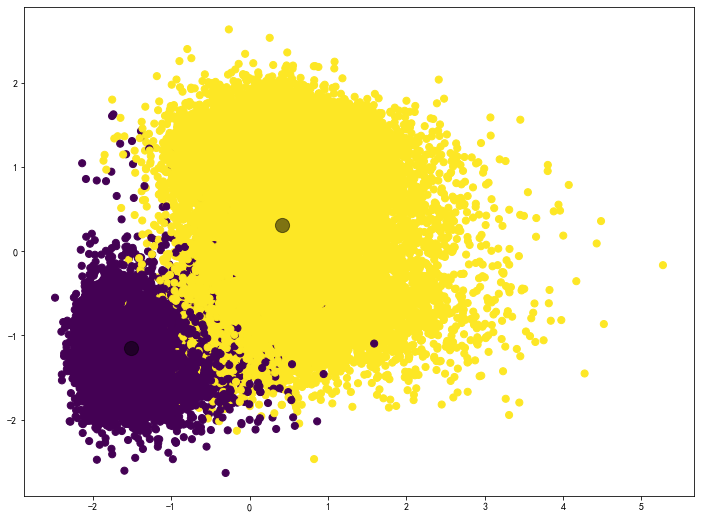

In [73]:
plt.scatter(df_scaled[:, 40], df_scaled[:, 44], c=y_predict, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 40], centers[:, 44], c='black', s=200, alpha=0.5)

#### Real Situation

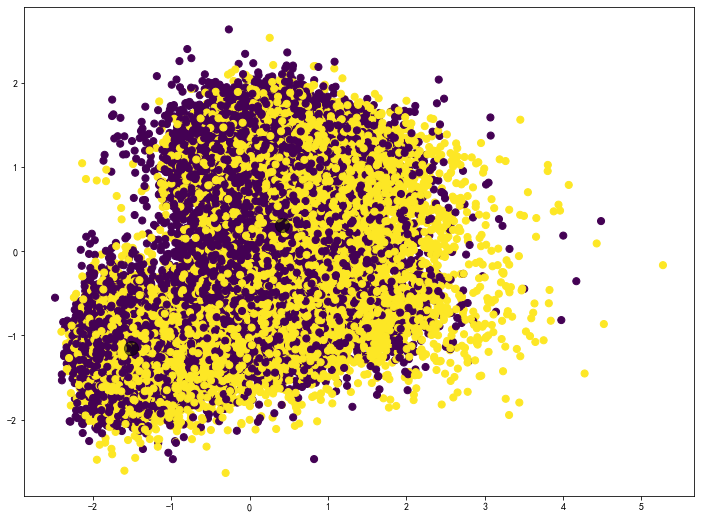

In [74]:
plt.scatter(df_scaled[:, 40], df_scaled[:, 44], c=y_result, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 40], centers[:, 44], c='black', s=200, alpha=0.5)

In [77]:
confusion_matrix(y_result, y_predict)

array([[ 5086, 18429],
       [ 4958, 18557]], dtype=int64)

In [79]:
tn, fp, fn, tp = confusion_matrix(y_result, y_predict).ravel()
tn, fp, fn, tp

(5086, 18429, 4958, 18557)

### Using PCA result

In [83]:
pca_path = cwd + r'\pca_result.csv'
pca_data = pd.read_csv(pca_path,index_col=0)

In [84]:
pca_data

,F1,F2,F3,F4
Rumble,0.772389,0.068296,0.326647,-0.310569
Elise,0.257514,-1.040161,-0.526724,-0.163869
Qiyana,0.853208,-0.197385,-0.481604,-0.537785
Miss Fortune,2.645053,-0.528051,-0.533476,-0.097398
Nautilus,-1.476325,-0.726554,-0.194531,0.628115
...,...,...,...,...
Gangplank,0.868203,1.595738,0.143187,0.026392
Graves,-0.793761,0.283254,-0.005892,-0.082636
Orianna,-0.385334,0.903143,0.434311,-0.338074
Aphelios,-0.608660,0.062449,-0.072404,-0.009257


In [85]:
n_clusters = 5
random_state = 0

In [86]:
heros_kmeans = KMeans(n_clusters=n_clusters, random_state=random_state).fit(pca_data)

In [97]:
heros_predict = heros_kmeans.predict(pca_data)
heros_predict

array([3, 3, 3, ..., 1, 1, 4])

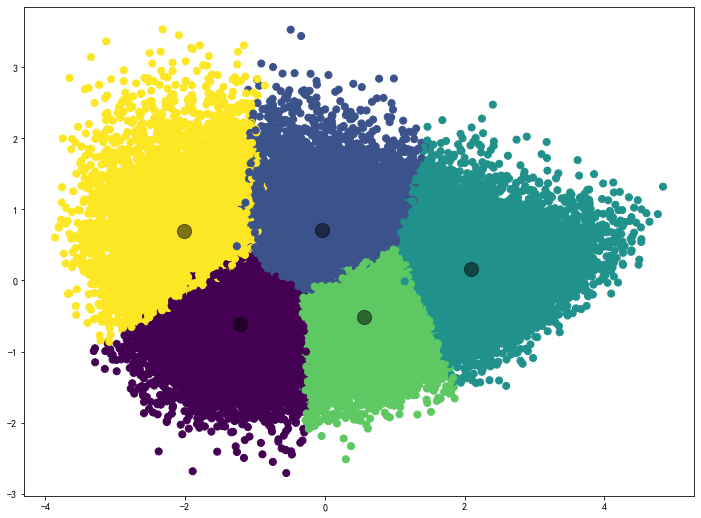

In [100]:
plt.scatter(pca_data.iloc[:, 0], pca_data.iloc[:, 1], c=heros_predict, s=50, cmap='viridis')
heros_centers = heros_kmeans.cluster_centers_
plt.scatter(heros_centers[:, 0], heros_centers[:, 1], c='black', s=200, alpha=0.5)